# Day 8 - building a simple image

- https://adventofcode.com/2019/day/8

This is mostly an 'iterate over data in chunks' task; the image is 25 x 6, we are given the data in layers, so we want to process the data in 25 x 6 == 150 integers at a time.

For part 1, we then put each layer through a `Counter` so we can select the layer with the lowest zero count, and then take the _1_ and _2_ counts to multiply them.

For part 2, we can then iterate over the layers to combine them into a merged image and display the data in rows of 25, another chunked iteration.


In [1]:
import aocd

data = list(map(int, aocd.get_data(day=8, year=2019)))

In [2]:
from typing import Iterable, Sequence, TypeVar

T = TypeVar("T")

W, H = 25, 6


def per_n(s: Sequence[T], n: int) -> Iterable[Sequence[T]]:
    return (s[i : i + n] for i in range(0, len(s), n))

In [3]:
from collections import Counter

layercounts = [Counter(layer) for layer in per_n(data, W * H)]
least0 = min(layercounts, key=lambda c: c[0])
print("Part 1:", least0[1] * least0[2])

Part 1: 2500


In [4]:
# construct image; 2 means we ignore the pixel and look at the next layer value
merged = [2] * W * H
for layer in per_n(data, W * H):
    merged = [a if a != 2 else b for a, b in zip(merged, layer)]

Part 2:


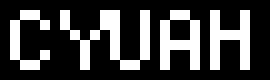

In [5]:
from PIL import Image


def render_image(merged: Sequence, scale: int = 10, border: bool = True) -> Image:
    img = Image.new("1", (W, H), None)
    img.putdata(merged)
    if border:
        with_border = Image.new("1", (W + 2, H + 2))
        with_border.paste(img, (1, 1))
        img = with_border
    if scale != 1:
        img = img.resize((img.width * scale, img.height * scale))
    return img


print("Part 2:")
render_image(merged)

In [6]:
%matplotlib inline
from typing import Optional, Tuple

import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation, colormaps, rc
from matplotlib.figure import Figure

rc("animation", html="html5")


def animate_layers(data: Sequence[int]) -> animation.FuncAnimation:
    # frames are determined by the layers, in reverse order (bottom layer first)
    frames: Sequence[Optional[Sequence[int]]] = [
        *(list(per_n(data, W * H))[::-1]),
        *([None] * 64),  # full fade for remainder
    ]

    fig, ax = plt.subplots(figsize=(12, 12 * (H / W)), facecolor="black", frameon=True)
    fig.subplots_adjust(left=0, bottom=0, right=1, top=1)
    ax.set_axis_off()

    grid = np.zeros((H + 2, W + 2), dtype=np.int8)
    image = ax.imshow(grid, vmin=0, vmax=1, cmap=colormaps["binary"].reversed())

    def render(layer: Optional[Sequence[int]]) -> Tuple[Figure]:
        if layer is not None:
            a = image.get_array()
            layerdata = np.array(layer).reshape(H, W)
            non_transparent = layerdata < 2
            a[1:-1, 1:-1][non_transparent] = layerdata[non_transparent]
        return (image,)

    anim = animation.FuncAnimation(
        fig, render, frames, interval=60, blit=True, repeat_delay=1000
    )
    plt.close(fig)
    return anim


animate_layers(data)